In [54]:
import numpy as np
import pandas as pd
import sunpy
import matplotlib.pyplot as plt

from sunpy.timeseries import TimeSeries
from sunpy.time import TimeRange, parse_time
from sunpy.net import hek, Fido, attrs as a
from astropy.io import fits
import astropy.units as u
import matplotlib.pyplot as plt
import drms
import sunpy.map
from sunpy.net import Fido, attrs as a
from astropy.time import Time,TimeDelta
from scipy.signal import find_peaks

In [2]:
ls

=3.1                        goes-xrs-report_2008.txt
CME deep learning.ipynb     goes-xrs-report_2009.txt
Correlating_metadata.ipynb  goes-xrs-report_2010.txt
Untitled.ipynb              goes-xrs-report_2011.txt
Untitled1.ipynb             goes-xrs-report_2012.txt
a.out*                      goes-xrs-report_2013.txt
flares_2004-2016            goes-xrs-report_2014.txt
flares_2010-2016            goes-xrs-report_2015.txt
goes-xrs-report_2004.txt    goes-xrs-report_2016.txt
goes-xrs-report_2005.txt    testing.c
goes-xrs-report_2006.txt    testing_xray_flux.csv
goes-xrs-report_2007.txt    xray_catalog.py


In [3]:
half_flares = open("flares_2010-2016",'r')

In [4]:
date = []
max_time = []
class_flare = []
intensity = []
for line in half_flares.readlines():
    print(line)
    line = line.split()
    if((line[4][0] == 'S') or (line[4][0] == 'N')):
        del line[4]
    date.append('20'+line[0][5:7]+'-'+line[0][7:9]+'-'+line[0][9:11]+'T'+line[2][0:2]+':'+line[2][2:4]+':00')
    max_time.append(line[3])
    class_flare.append(line[4])
    intensity.append(line[5])

31777110101  0017 0030 0022                                B 23    G15  1.4E-04 

31777110101  0049 0057 0053                                B 22    G15  7.3E-05 11140

31777110101  1811 1820 1814                                B 21    G15  8.1E-05 

31777110101  1937 1951 1944                                B 31    G15  1.9E-04 11140

31777110101  2152 2206 2159                                B 83    G15  4.5E-04 11140

31777110102  0903 0922 0910                                B 46    G15  4.0E-04 11140

31777110102  1601 1610 1607                                B 30    G15  9.6E-05 11140

31777110102  1906 1924 1915                                B 15    G15  1.4E-04 11140

31777110102  2009 2016 2012                                B 23    G15  6.1E-05 11140

31777110103  0436 0446 0441                                B 14    G15  6.0E-05 

31777110103  1319 1333 1325                                B 26    G15  1.6E-04 11141

31777110103  1344 1411 1353                               


31777120311  0723 0735 0728                                C 10    G15  7.4E-04                               

31777120311  1058 1113 1103                                B 95    G15  8.2E-04                               

31777120311  1359 1404 1402                                B 88    G15  2.9E-04                               

31777120312  0007 0014 0011                                C 14    G15  3.8E-04                               

31777120312  0134 0208 0155                                C 23    G15  3.8E-03                               

31777120312  1050 1101 1055                                B 88    G15  4.3E-04                               

31777120312  1157 1219 1209 N15E35                         C 16    G15  1.7E-03 11432 120315.1                

31777120312  2220 0056 0039                                C 41    G15  1.5E-02                               

31777120313  0145 0156 0150                                C 12    G15  6.0E-04                        

31777130519  0835 0840 0838 N19W69                         C 12    G15  3.1E-04       130514.0                

31777130519  0908 0924 0915 S11W58                         C 34    G15  2.1E-03 11750 130515.0                

31777130519  1142 1157 1150                                C 11    G15  1.0E-03                               

31777130519  1222 1229 1225 S09W63                         C 14    G15  3.7E-04 11750 130514.7                

31777130519  1413 1427 1420 S09W63                         C 11    G15  7.8E-04 11750 130514.8                

31777130519  1507 1524 1515 S09W63                         C 63    G15  3.3E-03 11750 130514.9                

31777130519  1706 1735 1724 S09W65                         C 42    G15  5.3E-03 11750 130514.8                

31777130519  1707 1818 1750 S09W65                         C 99    G15  2.3E-02 11750 130514.8                

31777130519  2111 2126 2121 S08W65                         C 47    G15  2.9E-03 11750 130515.0          


31777140314  0429 0436 0433                                C 24    G15  6.2E-04                               

31777140314  0546 0558 0552 N03W54                         C 47    G15  2.2E-03 12003 140310.2                

31777140314  0832 1042 1021                                C 50    G15  1.2E-02                               

31777140315  0020 0030 0026                                C 31    G15  1.1E-03                               

31777140315  0252 0302 0256                                C 15    G15  6.8E-04                               

31777140315  0318 0330 0321                                C 13    G15  9.7E-04                               

31777140315  0508 0520 0513                                C 13    G15  7.3E-04                               

31777140315  1431 1444 1437 S11E71                         C 12    G15  7.4E-04 11998 140320.9                

31777140315  1706 1733 1715 N05W72                         C 61    G15  6.9E-03 12003 140310.3         

31777150404  2216 0145 0007                                C 38    G15  3.5E-02                               

31777150405  0308 0357 0336                                C 19    G15  5.3E-03                               

31777150405  1826 1842 1834                                B 75    G15  6.5E-04                               

31777150405  2039 2129 2103                                C 30    G15  7.2E-03                               

31777150406  0546 0552 0550                                C 12    G15  2.7E-04                               

31777150406  1305 1310 1308                                B 80    G15  1.3E-04                               

31777150406  1835 1914 1906 S14E14                         C 30    G15  5.1E-03 12320 150407.8                

31777150407  0226 0255 0234                                B 85    G15  1.2E-03                               

31777150407  0332 0343 0337 N06E29                         B 82    G15  4.1E-04 12318 150409.3          

31777160923  1411 1438 1424                                B 33    G15  4.4E-04                               

31777160923  2138 2221 2201                                B 42    G15  8.6E-04                               

31777160924  0628 0639 0632                                B 19    G15  1.0E-04                               

31777160924  1540 1547 1543 S14W08                         B 39    G15  1.0E-04 12597 160924.0                

31777160924  1810 1821 1816 S14W10                         B 69    G15  2.9E-04 12597 160924.0                

31777160925  0306 0355 0331                                B 28    G15  6.8E-04                               

31777160925  0412 0429 0422                                B 32    G15  2.9E-04                               

31777160925  0713 0728 0717 S15W15                         B 21    G15  1.5E-04 12597 160924.1                

31777160925  1905 1921 1914                                C 13    G15  7.8E-04                         

In [28]:
contents = cray_flux.read()

M
e
t
a
d
a
t
a
 
D
e
s
c
r
i
p
t
i
o
n
:


d
i
m
e
n
s
i
o
n
s
:


r
e
c
o
r
d
 
=
 
U
N
L
I
M
I
T
E
D
;
 
/
/
(
2
6
3
4
 
c
u
r
r
e
n
t
l
y
)


o
r
b
i
t
 
=
 
1
;




v
a
r
i
a
b
l
e
s
:


d
o
u
b
l
e
 
t
i
m
e
_
t
a
g
_
o
r
b
i
t
(
o
r
b
i
t
)
;


t
i
m
e
_
t
a
g
_
o
r
b
i
t
:
l
o
n
g
_
n
a
m
e
 
=
 
"
D
a
t
e
 
a
n
d
 
t
i
m
e
 
f
o
r
 
e
a
c
h
 
w
e
s
t
_
l
o
n
g
i
t
u
d
e
 
a
n
d
 
i
n
c
l
i
n
a
t
i
o
n
 
p
a
i
r
"
;


t
i
m
e
_
t
a
g
_
o
r
b
i
t
:
u
n
i
t
s
 
=
 
"
D
a
t
e
 
a
n
d
 
t
i
m
e
 
i
n
 
t
h
e
 
f
o
r
m
a
t
 
Y
Y
Y
Y
-
m
m
-
d
d
 
h
h
:
m
m
:
s
s
.
S
S
S
 
U
T
C
"
;


t
i
m
e
_
t
a
g
_
o
r
b
i
t
:
c
a
l
e
n
d
a
r
 
=
 
"
g
r
e
g
o
r
i
a
n
"
;




f
l
o
a
t
 
w
e
s
t
_
l
o
n
g
i
t
u
d
e
(
o
r
b
i
t
)
;


w
e
s
t
_
l
o
n
g
i
t
u
d
e
:
d
e
s
c
r
i
p
t
i
o
n
 
=
 
"
W
e
s
t
 
l
o
n
g
i
t
u
d
e
 
o
f
 
s
a
t
e
l
l
i
t
e
 
s
u
b
-
o
r
b
i
t
 
p
o
i
n
t
 
a
t
 
t
h
e
 
g
i
v
e
n
 
d
a
t
e
 
a
n
d
 
t
i
m
e
.
"
;


w
e
s
t
_
l
o
n
g
i
t
u
d
e
:
l
o
n
g
_
l
a
b
e
l
 
=
 
"
W


L
U
X
:
m
i
s
s
i
n
g
_
v
a
l
u
e
 
=
 
"
-
9
9
9
9
9
"
;




f
l
o
a
t
 
A
4
E
_
Q
U
A
L
_
F
L
A
G
(
r
e
c
o
r
d
)
;


A
4
E
_
Q
U
A
L
_
F
L
A
G
:
d
e
s
c
r
i
p
t
i
o
n
 
=
 
"
Q
u
a
l
i
t
y
 
f
l
a
g
 
n
o
n
-
z
e
r
o
 
v
a
l
u
e
 
i
n
d
i
c
a
t
e
s
 
d
a
t
a
 
q
u
a
l
i
t
y
 
i
s
s
u
e
.
"
;


A
4
E
_
Q
U
A
L
_
F
L
A
G
:
l
o
n
g
_
l
a
b
e
l
 
=
 
"
q
u
a
l
i
t
y
 
f
l
a
g
"
;


A
4
E
_
Q
U
A
L
_
F
L
A
G
:
s
h
o
r
t
_
l
a
b
e
l
 
=
 
"
q
f
"
;


A
4
E
_
Q
U
A
L
_
F
L
A
G
:
p
l
o
t
_
l
a
b
e
l
 
=
 
"
 
"
;


A
4
E
_
Q
U
A
L
_
F
L
A
G
:
l
i
n
_
l
o
g
 
=
 
"
l
i
n
"
;


A
4
E
_
Q
U
A
L
_
F
L
A
G
:
u
n
i
t
s
 
=
 
"
q
f
"
;


A
4
E
_
Q
U
A
L
_
F
L
A
G
:
f
o
r
m
a
t
 
=
 
"
I
"
;


A
4
E
_
Q
U
A
L
_
F
L
A
G
:
n
o
m
i
n
a
l
_
m
i
n
 
=
 
"
0
"
;


A
4
E
_
Q
U
A
L
_
F
L
A
G
:
n
o
m
i
n
a
l
_
m
a
x
 
=
 
"
4
2
9
4
9
6
7
2
9
5
"
;


A
4
E
_
Q
U
A
L
_
F
L
A
G
:
m
i
s
s
i
n
g
_
v
a
l
u
e
 
=
 
"
9
9
9
9
9
"
;




f
l
o
a
t
 
A
4
E
_
C
R
(
r
e
c
o
r
d
)
;


A
4
E
_
C
R
:
d
e
s
c
r
i
p
t
i
o
n


v
a
l
u
e
 
=
 
"
-
9
9
9
9
9
"
;




/
/
 
g
l
o
b
a
l
 
a
t
t
r
i
b
u
t
e
s


:
c
o
n
v
e
n
t
i
o
n
s
 
=
 
"
G
O
E
S
 
S
p
a
c
e
 
W
e
a
t
h
e
r
"


:
t
i
t
l
e
 
=
 
"
G
O
E
S
 
E
l
e
c
t
r
o
n
,
P
r
o
t
o
n
,
A
l
p
h
a
 
D
e
t
e
c
t
o
r
"


:
i
n
s
t
i
t
u
t
i
o
n
 
=
 
"
N
O
A
A
"


:
s
o
u
r
c
e
 
=
 
"
S
a
t
e
l
l
i
t
e
 
I
n
s
i
t
u
 
O
b
s
e
r
v
a
t
i
o
n
s
"


:
s
a
t
e
l
l
i
t
e
_
i
d
 
=
 
"
G
O
E
S
-
1
5
"


:
i
n
s
t
r
u
m
e
n
t
 
=
 
"
E
l
e
c
t
r
o
n
,
P
r
o
t
o
n
,
A
l
p
h
a
 
D
e
t
e
c
t
o
r
"


:
p
r
o
c
e
s
s
-
t
y
p
e
 
=
 
"
F
u
l
l
 
r
e
s
o
l
u
t
i
o
n
"


:
p
r
o
c
e
s
s
-
l
e
v
e
l
 
=
 
"
l
e
v
e
l
 
1
b
"


:
s
a
m
p
l
e
-
t
i
m
e
 
=
 
"
3
2
"


:
s
a
m
p
l
e
-
u
n
i
t
 
=
 
"
s
e
c
o
n
d
s
"


:
c
r
e
a
t
i
o
n
_
d
a
t
e
 
=
 
"
2
0
1
3
-
0
6
-
0
3
 
0
8
:
4
6
:
0
6
.
4
6
0
 
U
T
C
"


:
s
t
a
r
t
_
d
a
t
e
 
=
 
"
2
0
1
3
-
0
6
-
0
2
 
0
0
:
0
0
:
2
7
.
3
5
7
 
U
T
C
"


:
e
n
d
_
d
a
t
e
 
=
 
"
2
0
1
3
-
0
6
-
0
2
 
2
3
:
5
9
:
3
0
.
4
1
0
 
U
T
C
"




0
:
2
5
:
3
4
.
6
8
3
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
5
4
7
6
E
-
0
3
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
4
6
8
8
E
-
0
4
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
0
0
:
2
6
:
0
7
.
4
5
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
9
1
4
6
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
7
3
2
3
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
0
0
:
2
6
:
4
0
.
2
2
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
0
0
:
2
7
:
1
2
.
9
8
7
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
9
1
4
6
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
3
7
3
3
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
4
6
8
8
E
-
0
4
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
0
0
:
2
7
:
4
5
.
7
5
7
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
5
4
7
6
E
-
0
3
,


3
:
5
8
.
6
2
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
7
3
2
3
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
0
0
:
5
4
:
3
1
.
3
8
7
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
9
1
4
6
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
3
7
3
3
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
4
6
8
8
E
-
0
4
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
0
0
:
5
5
:
0
4
.
1
5
7
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
4
6
8
8
E
-
0
4
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
0
0
:
5
5
:
3
6
.
9
2
3
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
0
0
:
5
6
:
0
9
.
6
9
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
7
3
2
3
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 


3
.
0
4
8
8
E
-
0
2
,
1
.
7
3
2
3
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
0
1
:
2
2
:
5
5
.
3
2
3
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
5
4
7
6
E
-
0
3
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
4
6
8
8
E
-
0
4
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
7
3
2
3
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
0
1
:
2
3
:
2
8
.
0
9
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
9
1
4
6
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
6
.
0
9
7
6
E
-
0
2
,
1
.
6
9
3
8
E
-
0
3
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
0
1
:
2
4
:
0
0
.
8
6
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
3
7
3
3
E
-
0
2
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
5
4
7
6
E
-
0
3
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
0
1
:
2
4
:
3
3
.
6
2
7
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
9
1
4
6
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
3
7
3
3
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
0
1
:
2
5


0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
5
4
7
6
E
-
0
3
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
7
3
2
3
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
0
1
:
4
9
:
4
0
.
9
5
7
,
0
,
6
.
0
9
7
6
E
-
0
2
,
1
.
7
8
2
9
E
-
0
1
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
5
4
7
6
E
-
0
3
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
0
1
:
5
0
:
1
3
.
7
2
3
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
9
1
4
6
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
6
.
0
9
7
6
E
-
0
2
,
3
.
0
9
5
2
E
-
0
3
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
0
1
:
5
0
:
4
6
.
4
9
3
,
0
,
6
.
0
9
7
6
E
-
0
2
,
1
.
7
8
2
9
E
-
0
1
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
3
7
3
3
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
4
6
8
8
E
-
0
4
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
7
3
2
3
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
0
1
:
5
1
:
1
9
.
2
6
0
,
0
,
6
.
0
9
7
6
E
-
0
2
,
1
.
7
8
2
9
E
-
0
1
,
0
,
0
.
0
,
0
.
0
,


.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
4
6
8
8
E
-
0
4
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
0
2
:
1
5
:
2
1
.
0
5
3
,
0
,
6
.
0
9
7
6
E
-
0
2
,
1
.
7
8
2
9
E
-
0
1
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
5
4
7
6
E
-
0
3
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
4
6
8
8
E
-
0
4
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
0
2
:
1
5
:
5
3
.
8
2
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
9
1
4
6
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
0
2
:
1
6
:
2
6
.
5
9
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
9
1
4
6
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
6
.
0
9
7
6
E
-
0
2
,
1
.
6
9
3
8
E
-
0
3
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
0
2
:
1
6
:
5
9
.
3
5
7
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
5
4
7
6
E
-
0
3
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
0
2
:
1
7
:
3
2
.
1
2
7
,
0
,
3
.
0


4
6
8
8
E
-
0
4
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
7
3
2
3
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
0
2
:
4
1
:
0
1
.
1
5
0
,
0
,
6
.
0
9
7
6
E
-
0
2
,
1
.
7
8
2
9
E
-
0
1
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
0
2
:
4
1
:
3
3
.
9
1
7
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
0
2
:
4
2
:
0
6
.
6
8
7
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
4
.
7
7
8
7
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
0
2
:
4
2
:
3
9
.
4
5
3
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
9
1
4
6
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
7
3
2
3
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
0
2
:
4
3
:
1
2
.
2
2
3
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0


2
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
4
6
8
8
E
-
0
4
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
7
3
2
3
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
0
3
:
0
2
:
5
1
.
8
7
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
4
6
8
8
E
-
0
4
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
7
3
2
3
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
0
3
:
0
3
:
2
4
.
6
4
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
7
3
2
3
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
0
3
:
0
3
:
5
7
.
4
0
7
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
9
1
4
6
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
5
4
7
6
E
-
0
3
,
0
,
9
.
1
4
6
3
E
-
0
2
,
2
.
5
4
0
7
E
-
0
3
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
0
3
:
0
4
:
3
0
.
1
7
7
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
0
3
:
0
5
:
0
2
.


,
8
.
9
1
4
6
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
0
3
:
3
6
:
1
0
.
7
2
0
,
0
,
6
.
0
9
7
6
E
-
0
2
,
1
.
7
8
2
9
E
-
0
1
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
4
6
8
8
E
-
0
4
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
7
3
2
3
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
0
3
:
3
6
:
4
3
.
4
8
7
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
5
4
7
6
E
-
0
3
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
4
6
8
8
E
-
0
4
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
7
3
2
3
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
0
3
:
3
7
:
1
6
.
2
5
7
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
4
.
7
7
8
7
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
5
4
7
6
E
-
0
3
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
4
6
8
8
E
-
0
4
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
0
3
:
3
7
:
4
9
.
0
2
3
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
9
1
4
6
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,


1
3
-
0
6
-
0
2
 
0
3
:
5
6
:
2
3
.
1
3
7
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
9
1
4
6
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
7
3
2
3
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
0
3
:
5
6
:
5
5
.
9
0
3
,
0
,
1
.
2
1
9
5
E
-
0
1
,
3
.
5
6
5
8
E
-
0
1
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
0
3
:
5
7
:
2
8
.
6
7
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
3
7
3
3
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
4
6
8
8
E
-
0
4
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
7
3
2
3
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
0
3
:
5
8
:
0
1
.
4
4
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
5
4
7
6
E
-
0
3
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
0
3
:
5
8
:
3
4
.
2
0
7
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
9
1
4
6
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,


 
0
4
:
2
6
:
5
8
.
1
4
3
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
4
.
7
7
8
7
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
5
4
7
6
E
-
0
3
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
0
4
:
2
7
:
3
0
.
9
1
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
9
1
4
6
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
6
.
0
9
7
6
E
-
0
2
,
3
.
4
6
4
5
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
0
4
:
2
8
:
0
3
.
6
7
7
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
5
4
7
6
E
-
0
3
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
7
3
2
3
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
0
4
:
2
8
:
3
6
.
4
4
7
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
3
7
3
3
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
0
4
:
2
9
:
0
9
.
2
1
3
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,


0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
0
4
:
5
8
:
3
8
.
6
8
3
,
0
,
6
.
0
9
7
6
E
-
0
2
,
1
.
7
8
2
9
E
-
0
1
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
6
.
0
9
7
6
E
-
0
2
,
3
.
4
6
4
5
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
0
4
:
5
9
:
1
1
.
4
5
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
9
1
4
6
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
6
.
0
9
7
6
E
-
0
2
,
1
.
6
9
3
8
E
-
0
3
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
7
3
2
3
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
0
4
:
5
9
:
4
4
.
2
2
0
,
0
,
6
.
0
9
7
6
E
-
0
2
,
1
.
7
8
2
9
E
-
0
1
,
0
,
3
.
0
4
8
8
E
-
0
2
,
4
.
7
7
8
7
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
6
.
0
9
7
6
E
-
0
2
,
3
.
4
6
4
5
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
0
5
:
0
0
:
1
6
.
9
8
7
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
3
7
3
3
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
6
.
0
9
7
6
E
-
0
2
,
1
.
6
9
3
8
E
-
0
3
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
7
3
2
3
E
-
0
4




8
E
-
0
2
,
1
.
5
4
7
6
E
-
0
3
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
4
6
8
8
E
-
0
4
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
7
3
2
3
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
0
5
:
2
6
:
2
9
.
8
4
7
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
9
1
4
6
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
5
4
7
6
E
-
0
3
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
7
3
2
3
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
0
5
:
2
7
:
0
2
.
6
1
7
,
0
,
6
.
0
9
7
6
E
-
0
2
,
1
.
7
8
2
9
E
-
0
1
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
6
.
0
9
7
6
E
-
0
2
,
1
.
6
9
3
8
E
-
0
3
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
0
5
:
2
7
:
3
5
.
3
8
3
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
0
5
:
2
8
:
0
8
.
1
5
0
,
0
,
6
.
0
9
7
6
E
-
0
2
,
1
.
7
8
2
9
E
-
0
1
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
5
4
7
6
E
-
0
3
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2


8
8
E
-
0
2
,
1
.
7
3
2
3
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
0
5
:
4
8
:
5
3
.
3
3
3
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
3
7
3
3
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
7
3
2
3
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
0
5
:
4
9
:
2
6
.
1
0
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
0
5
:
4
9
:
5
8
.
8
6
7
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
9
1
4
6
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
5
4
7
6
E
-
0
3
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
7
3
2
3
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
0
5
:
5
0
:
3
1
.
6
3
7
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
3
7
3
3
E
-
0
2
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
5
4
7
6
E
-
0
3
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
4
6
8
8
E
-
0
4
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
0
5
:
5
1
:
0
4
.
4
0
3
,
0
,
0
.
0
,
0
.
0
,


,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
0
6
:
2
0
:
0
1
.
1
0
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
7
3
2
3
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
0
6
:
2
0
:
3
3
.
8
7
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
9
1
4
6
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
4
6
8
8
E
-
0
4
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
0
6
:
2
1
:
0
6
.
6
3
7
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
4
6
8
8
E
-
0
4
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
7
3
2
3
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
0
6
:
2
1
:
3
9
.
4
0
7
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
7
3
2
3
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
0
6
:
2
2
:
1
2
.
1
7
3
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
9
1
4
6
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0


0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
0
6
:
4
4
:
3
5
.
6
5
7
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
6
.
0
9
7
6
E
-
0
2
,
3
.
4
6
4
5
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
0
6
:
4
5
:
0
8
.
4
2
3
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
4
.
7
7
8
7
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
4
6
8
8
E
-
0
4
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
7
3
2
3
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
0
6
:
4
5
:
4
1
.
1
9
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
3
7
3
3
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
4
6
8
8
E
-
0
4
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
0
6
:
4
6
:
1
3
.
9
5
7
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
5
4
7
6
E
-
0
3
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
0
6
:
4
6
:
4
6
.
7
2
7
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
9
1
4


0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
0
7
:
1
0
:
4
8
.
5
1
0
,
0
,
6
.
0
9
7
6
E
-
0
2
,
1
.
7
8
2
9
E
-
0
1
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
0
7
:
1
1
:
2
1
.
2
7
7
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
7
3
2
3
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
0
7
:
1
1
:
5
4
.
0
4
7
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
5
4
7
6
E
-
0
3
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
4
6
8
8
E
-
0
4
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
0
7
:
1
2
:
2
6
.
8
1
3
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
4
6
8
8
E
-
0
4
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
7
3
2
3
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
0
7
:
1
2
:
5
9
.
5
8
3
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1


0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
4
6
8
8
E
-
0
4
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
0
7
:
3
4
:
1
7
.
5
2
7
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
9
1
4
6
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
5
4
7
6
E
-
0
3
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
0
7
:
3
4
:
5
0
.
2
9
3
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
9
1
4
6
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
0
7
:
3
5
:
2
3
.
0
6
3
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
5
4
7
6
E
-
0
3
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
0
7
:
3
5
:
5
5
.
8
3
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
3
7
3
3
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
7
3
2
3
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
0
7
:
3
6
:
2
8
.
5
9
7
,
0
,
0
.
0
,
0
.
0


0
6
-
0
2
 
0
7
:
5
9
:
2
4
.
8
4
3
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
9
1
4
6
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
4
6
8
8
E
-
0
4
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
0
7
:
5
9
:
5
7
.
6
1
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
3
7
3
3
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
4
6
8
8
E
-
0
4
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
0
8
:
0
0
:
3
0
.
3
8
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
5
4
7
6
E
-
0
3
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
0
8
:
0
1
:
0
3
.
1
4
7
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
3
7
3
3
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
7
3
2
3
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
0
8
:
0
1
:
3
5
.
9
1
7
,
0
,
6
.
0
9
7
6
E
-
0
2
,
1
.
7
8
2
9
E
-
0
1
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3


.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
5
4
7
6
E
-
0
3
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
7
3
2
3
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
0
8
:
2
4
:
3
2
.
1
6
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
0
8
:
2
5
:
0
4
.
9
2
7
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
5
4
7
6
E
-
0
3
,
0
,
0
.
0
,
0
.
0
,
0
,
6
.
0
9
7
6
E
-
0
2
,
3
.
4
6
4
5
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
0
8
:
2
5
:
3
7
.
6
9
7
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
5
4
7
6
E
-
0
3
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
0
8
:
2
6
:
1
0
.
4
6
3
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
3
7
3
3
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
0
8
:
2
6
:
4
3
.
2
3
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0


4
8
8
E
-
0
2
,
4
.
7
7
8
7
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
0
8
:
5
5
:
3
9
.
9
2
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
9
1
4
6
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
4
6
8
8
E
-
0
4
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
0
8
:
5
6
:
1
2
.
6
8
7
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
9
.
1
4
6
3
E
-
0
2
,
2
.
5
4
0
7
E
-
0
3
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
0
8
:
5
6
:
4
5
.
4
5
7
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
4
6
8
8
E
-
0
4
,
0
,
6
.
0
9
7
6
E
-
0
2
,
3
.
4
6
4
5
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
0
8
:
5
7
:
1
8
.
2
2
3
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
6
.
0
9
7
6
E
-
0
2
,
3
.
0
9
5
2
E
-
0
3
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
0
8
:
5
7
:
5
0
.
9


6
.
0
9
7
6
E
-
0
2
,
3
.
0
9
5
2
E
-
0
3
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
0
9
:
3
2
:
1
5
.
3
5
7
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
4
6
8
8
E
-
0
4
,
0
,
6
.
0
9
7
6
E
-
0
2
,
3
.
4
6
4
5
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
0
9
:
3
2
:
4
8
.
1
2
3
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
9
1
4
6
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
6
.
0
9
7
6
E
-
0
2
,
3
.
4
6
4
5
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
0
9
:
3
3
:
2
0
.
8
9
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
9
1
4
6
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
5
4
7
6
E
-
0
3
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
0
9
:
3
3
:
5
3
.
6
6
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
6
.
0
9
7
6
E
-
0
2
,
3
.
4
6
4
5
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
0
9
:
3
4
:
2
6
.
4
2
7
,


0
:
0
3
:
2
3
.
1
1
3
,
0
,
6
.
0
9
7
6
E
-
0
2
,
1
.
7
8
2
9
E
-
0
1
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
1
0
:
0
3
:
5
5
.
8
8
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
9
1
4
6
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
3
7
3
3
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
1
0
:
0
4
:
2
8
.
6
4
7
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
7
3
2
3
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
1
0
:
0
5
:
0
1
.
4
1
7
,
0
,
6
.
0
9
7
6
E
-
0
2
,
1
.
7
8
2
9
E
-
0
1
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
6
.
0
9
7
6
E
-
0
2
,
1
.
6
9
3
8
E
-
0
3
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
7
3
2
3
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
1
0
:
0
5
:
3
4
.
1
8
3
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
3
7
3
3
E
-
0
2
,
0
,
6
.
0
9
7
6
E
-


6
-
0
2
 
1
0
:
3
7
:
4
7
.
4
7
3
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
1
0
:
3
8
:
2
0
.
2
4
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
6
.
0
9
7
6
E
-
0
2
,
3
.
4
6
4
5
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
1
0
:
3
8
:
5
3
.
0
0
7
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
6
.
0
9
7
6
E
-
0
2
,
3
.
0
9
5
2
E
-
0
3
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
1
0
:
3
9
:
2
5
.
7
7
7
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
7
3
2
3
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
1
0
:
3
9
:
5
8
.
5
4
3
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
9
1
4
6
E
-
0
2
,
0
,
3
.
0
4
8
8
E
-
0
2
,
4
.
7
7
8
7
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
1
0
:
4
0


.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
1
1
:
1
1
:
3
9
.
0
6
3
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
3
7
3
3
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
1
1
:
1
2
:
1
1
.
8
3
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
9
1
4
6
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
1
1
:
1
2
:
4
4
.
6
0
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
3
7
3
3
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
1
1
:
1
3
:
1
7
.
3
6
7
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
9
1
4
6
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
4
6
8
8
E
-
0
4
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
1
1
:
1
3
:
5
0
.
1
3
3
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0


7
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
4
6
8
8
E
-
0
4
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
7
3
2
3
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
1
1
:
4
7
:
0
8
.
9
5
7
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
9
1
4
6
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
3
7
3
3
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
1
1
:
4
7
:
4
1
.
7
2
3
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
4
.
7
7
8
7
E
-
0
2
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
3
7
3
3
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
4
6
8
8
E
-
0
4
,
0
,
6
.
0
9
7
6
E
-
0
2
,
3
.
4
6
4
5
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
1
1
:
4
8
:
1
4
.
4
9
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
5
4
7
6
E
-
0
3
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
1
1
:
4
8
:
4
7
.
2
5
7
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,


0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
4
6
8
8
E
-
0
4
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
1
2
:
1
6
:
0
5
.
6
3
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
9
1
4
6
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
4
6
8
8
E
-
0
4
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
7
3
2
3
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
1
2
:
1
6
:
3
8
.
3
9
7
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
4
6
8
8
E
-
0
4
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
1
2
:
1
7
:
1
1
.
1
6
7
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
9
1
4
6
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
7
3
2
3
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
1
2
:
1
7
:
4
3
.
9
3
3
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
4
6
8
8
E
-
0
4
,
0
,
9
.
1
4
6
3
E
-
0
2
,
5
.
1


0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
3
7
3
3
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
4
6
8
8
E
-
0
4
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
7
3
2
3
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
1
2
:
4
6
:
4
0
.
6
1
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
4
.
7
7
8
7
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
7
3
2
3
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
1
2
:
4
7
:
1
3
.
3
8
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
4
.
7
7
8
7
E
-
0
2
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
3
7
3
3
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
1
.
2
1
9
5
E
-
0
1
,
3
.
3
8
7
5
E
-
0
3
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
1
2
:
4
7
:
4
6
.
1
4
7
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
9
1
4
6
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
5
4
7
6
E
-
0
3
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
4
6
8
8
E
-
0
4
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
1
2
:
4
8
:
1
8
.
9
1
3
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,


1
2
:
5
3
.
4
5
3
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
5
4
7
6
E
-
0
3
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
4
6
8
8
E
-
0
4
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
1
3
:
1
3
:
2
6
.
2
2
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
4
6
8
8
E
-
0
4
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
1
3
:
1
3
:
5
8
.
9
8
7
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
4
.
7
7
8
7
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
9
.
1
4
6
3
E
-
0
2
,
5
.
1
9
6
8
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
1
3
:
1
4
:
3
1
.
7
5
7
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
9
1
4
6
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
7
3
2
3
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
1
3
:
1
5
:
0
4
.
5
2
3
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
4


.
9
1
4
6
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
6
.
0
9
7
6
E
-
0
2
,
3
.
0
9
5
2
E
-
0
3
,
0
,
6
.
0
9
7
6
E
-
0
2
,
1
.
6
9
3
8
E
-
0
3
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
7
3
2
3
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
1
3
:
4
1
:
5
0
.
1
3
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
4
6
8
8
E
-
0
4
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
1
3
:
4
2
:
2
2
.
8
9
7
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
7
3
2
3
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
1
3
:
4
2
:
5
5
.
6
6
7
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
4
.
7
7
8
7
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
1
3
:
4
3
:
2
8
.
4
3
3
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
5
4
7
6
E
-
0
3
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
4
6
8
8
E
-
0
4
,
0
,


,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
5
4
7
6
E
-
0
3
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
1
4
:
1
0
:
1
4
.
0
4
3
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
5
4
7
6
E
-
0
3
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
4
6
8
8
E
-
0
4
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
1
4
:
1
0
:
4
6
.
8
1
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
4
6
8
8
E
-
0
4
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
7
3
2
3
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
1
4
:
1
1
:
1
9
.
5
7
7
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
4
6
8
8
E
-
0
4
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
1
4
:
1
1
:
5
2
.
3
4
3
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
1
4
:
1
2
:
2
5
.
1
1
3
,
0
,
0
.
0
,
0


1
3
-
0
6
-
0
2
 
1
4
:
4
1
:
2
1
.
7
9
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
7
3
2
3
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
1
4
:
4
1
:
5
4
.
5
5
7
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
7
3
2
3
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
1
4
:
4
2
:
2
7
.
3
2
7
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
4
.
7
7
8
7
E
-
0
2
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
3
7
3
3
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
1
4
:
4
3
:
0
0
.
0
9
3
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
1
4
:
4
3
:
3
2
.
8
6
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
1
4
:
4
4
:
0
5
.
6
2
7
,
0
,




2
0
1
3
-
0
6
-
0
2
 
1
5
:
1
6
:
5
1
.
6
8
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
9
1
4
6
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
5
4
7
6
E
-
0
3
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
7
3
2
3
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
1
5
:
1
7
:
2
4
.
4
4
7
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
1
5
:
1
7
:
5
7
.
2
1
7
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
9
1
4
6
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
1
5
:
1
8
:
2
9
.
9
8
3
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
5
4
7
6
E
-
0
3
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
7
3
2
3
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
1
5
:
1
9
:
0
2
.
7
5
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0


,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
5
4
7
6
E
-
0
3
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
1
5
:
5
6
:
1
0
.
9
4
3
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
1
5
:
5
6
:
4
3
.
7
1
3
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
3
7
3
3
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
6
.
0
9
7
6
E
-
0
2
,
1
.
6
9
3
8
E
-
0
3
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
1
5
:
5
7
:
1
6
.
4
8
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
3
7
3
3
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
1
5
:
5
7
:
4
9
.
2
4
7
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
7
3
2
3
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
1
5
:
5
8
:
2
2
.
0
1
3
,
0
,
0
.
0
,
0
.
0


,
0
,
0
.
0
,
0
.
0
,
0
,
6
.
0
9
7
6
E
-
0
2
,
3
.
4
6
4
5
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
1
6
:
3
7
:
0
8
.
5
1
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
3
7
3
3
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
4
6
8
8
E
-
0
4
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
7
3
2
3
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
1
6
:
3
7
:
4
1
.
2
8
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
1
6
:
3
8
:
1
4
.
0
4
7
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
1
6
:
3
8
:
4
6
.
8
1
3
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
6
.
0
9
7
6
E
-
0
2
,
3
.
0
9
5
2
E
-
0
3
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
1
6
:
3
9
:
1
9
.
5
8
3
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
7
3
2
3
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
1
7
:
0
7
:
4
3
.
4
9
7
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
9
1
4
6
E
-
0
2
,
0
,
3
.
0
4
8
8
E
-
0
2
,
4
.
7
7
8
7
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
4
6
8
8
E
-
0
4
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
1
7
:
0
8
:
1
6
.
2
6
3
,
0
,
6
.
0
9
7
6
E
-
0
2
,
1
.
7
8
2
9
E
-
0
1
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
1
7
:
0
8
:
4
9
.
0
3
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
1
7
:
0
9
:
2
1
.
8
0
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
7
3
2
3
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
1
7
:
0
9
:
5
4
.
5
6
7
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
7
3
2
3
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
1
7
:
3
5
:
0
1
.
8
7
7
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
6
.
0
9
7
6
E
-
0
2
,
3
.
4
6
4
5
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
1
7
:
3
5
:
3
4
.
6
4
3
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
7
3
2
3
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
1
7
:
3
6
:
0
7
.
4
1
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
4
.
7
7
8
7
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
5
4
7
6
E
-
0
3
,
0
,
0
.
0
,
0
.
0
,
0
,
6
.
0
9
7
6
E
-
0
2
,
3
.
4
6
4
5
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
1
7
:
3
6
:
4
0
.
1
8
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
3
7
3
3
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
1
7
:
3
7
:
1
2
.
9
4
7
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


-
0
2
,
1
.
3
7
3
3
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
4
6
8
8
E
-
0
4
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
7
3
2
3
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
1
8
:
1
1
:
3
7
.
3
0
7
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
1
8
:
1
2
:
1
0
.
0
7
3
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
6
.
0
9
7
6
E
-
0
2
,
3
.
4
6
4
5
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
1
8
:
1
2
:
4
2
.
8
4
3
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
5
4
7
6
E
-
0
3
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
4
6
8
8
E
-
0
4
,
0
,
6
.
0
9
7
6
E
-
0
2
,
3
.
4
6
4
5
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
1
8
:
1
3
:
1
5
.
6
1
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
3
7
3
3
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
1
8
:
1
3
:
4
8
.
3


0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
6
.
0
9
7
6
E
-
0
2
,
3
.
4
6
4
5
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
1
8
:
4
7
:
3
9
.
9
7
3
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
7
3
2
3
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
1
8
:
4
8
:
1
2
.
7
4
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
4
6
8
8
E
-
0
4
,
0
,
9
.
1
4
6
3
E
-
0
2
,
5
.
1
9
6
8
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
1
8
:
4
8
:
4
5
.
5
0
7
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
6
.
0
9
7
6
E
-
0
2
,
3
.
4
6
4
5
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
1
8
:
4
9
:
1
8
.
2
7
7
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
9
1
4
6
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
5
4
7
6
E
-
0
3
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
4
6
8
8
E
-
0
4
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
1


0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
4
.
7
7
8
7
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
6
.
0
9
7
6
E
-
0
2
,
3
.
0
9
5
2
E
-
0
3
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
7
3
2
3
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
1
9
:
2
6
:
5
9
.
2
4
7
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
6
.
0
9
7
6
E
-
0
2
,
3
.
4
6
4
5
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
1
9
:
2
7
:
3
2
.
0
1
3
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
9
1
4
6
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
6
.
0
9
7
6
E
-
0
2
,
2
.
7
4
6
6
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
7
3
2
3
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
1
9
:
2
8
:
0
4
.
7
8
3
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
1
9
:
2
8
:
3
7
.
5
5
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
9
1
4
6
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.


0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
1
9
:
5
1
:
0
1
.
0
2
7
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
9
1
4
6
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
6
.
0
9
7
6
E
-
0
2
,
3
.
0
9
5
2
E
-
0
3
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
7
3
2
3
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
1
9
:
5
1
:
3
3
.
7
9
7
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
7
3
2
3
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
1
9
:
5
2
:
0
6
.
5
6
3
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
7
3
2
3
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
1
9
:
5
2
:
3
9
.
3
3
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
4
6
8
8
E
-
0
4
,
0
,
6
.
0
9
7
6
E
-
0
2
,
3
.
4
6
4
5
E
-
0
4


2
0
1
3
-
0
6
-


,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
7
3
2
3
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
2
0
:
1
9
:
2
4
.
9
5
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
9
1
4
6
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
2
0
:
1
9
:
5
7
.
7
2
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
2
0
:
2
0
:
3
0
.
4
8
7
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
7
3
2
3
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
2
0
:
2
1
:
0
3
.
2
5
3
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
2
0
:
2
1
:
3
6
.
0
2
3
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0


0
1
3
-
0
6
-
0
2
 
2
0
:
4
8
:
2
1
.
6
4
3
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
4
.
7
7
8
7
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
5
4
7
6
E
-
0
3
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
2
0
:
4
8
:
5
4
.
4
1
3
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
6
.
0
9
7
6
E
-
0
2
,
3
.
0
9
5
2
E
-
0
3
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
4
6
8
8
E
-
0
4
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
2
0
:
4
9
:
2
7
.
1
8
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
7
3
2
3
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
2
0
:
4
9
:
5
9
.
9
4
7
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
6
.
0
9
7
6
E
-
0
2
,
1
.
6
9
3
8
E
-
0
3
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
2
0
:
5
0
:
3
2
.
7
1
7
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
5
4
7
6
E
-
0
3
,
0
,
0


0
.
0


2
0
1
3
-
0
6
-
0
2
 
2
1
:
2
2
:
1
3
.
2
5
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
6
.
0
9
7
6
E
-
0
2
,
3
.
0
9
5
2
E
-
0
3
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
7
3
2
3
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
2
1
:
2
2
:
4
6
.
0
1
7
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
5
4
7
6
E
-
0
3
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
4
6
8
8
E
-
0
4
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
2
1
:
2
3
:
1
8
.
7
8
7
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
9
1
4
6
E
-
0
2
,
0
,
3
.
0
4
8
8
E
-
0
2
,
4
.
7
7
8
7
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
9
.
1
4
6
3
E
-
0
2
,
2
.
5
4
0
7
E
-
0
3
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
2
1
:
2
3
:
5
1
.
5
5
3
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
3
7
3
3
E
-
0
2
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
5
4
7
6
E
-
0
3
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
2
1
:
2
4
:
2
4
.
3
2
0
,
0
,
0
.
0
,
0
.
0
,


5
4
7
6
E
-
0
3
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
7
3
2
3
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
2
1
:
5
6
:
3
7
.
6
2
7
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
2
1
:
5
7
:
1
0
.
3
9
3
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
5
4
7
6
E
-
0
3
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
7
3
2
3
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
2
1
:
5
7
:
4
3
.
1
6
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
5
4
7
6
E
-
0
3
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
7
3
2
3
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
2
1
:
5
8
:
1
5
.
9
3
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
3
7
3
3
E
-
0
2
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
5
4
7
6
E
-
0
3
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
7
3
2
3
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
2
1
:
5
8
:
4
8
.
6
9
7


2
0
1
3
-
0
6
-
0
2
 
2
2
:
2
6
:
0
7
.
0
9
3
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
4
6
8
8
E
-
0
4
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
2
2
:
2
6
:
3
9
.
8
6
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
2
2
:
2
7
:
1
2
.
6
2
7
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
6
.
0
9
7
6
E
-
0
2
,
1
.
6
9
3
8
E
-
0
3
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
2
2
:
2
7
:
4
5
.
3
9
7
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
4
.
7
7
8
7
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
2
2
:
2
8
:
1
8
.
1
6
3
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
4
6
8
8
E
-
0
4
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
7
3
2
3
E
-
0
4


2
0
1
3
-
0
6
-
0
2


7
6
E
-
0
3
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
4
6
8
8
E
-
0
4
,
0
,
6
.
0
9
7
6
E
-
0
2
,
3
.
4
6
4
5
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
2
2
:
5
6
:
4
2
.
0
9
7
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
5
4
7
6
E
-
0
3
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
7
3
2
3
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
2
2
:
5
7
:
1
4
.
8
6
3
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
7
3
2
3
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
2
2
:
5
7
:
4
7
.
6
3
3
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
9
1
4
6
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
7
3
2
3
E
-
0
4


2
0
1
3
-
0
6
-
0
2
 
2
2
:
5
8
:
2
0
.
4
0
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
4
6
8
8
E
-
0
4
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
2
2
:
5
8
:
5
3
.
1
6
7
,
0


0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
2
3
:
3
2
:
4
4
.
7
8
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
9
1
4
6
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
4
6
8
8
E
-
0
4
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
2
3
:
3
3
:
1
7
.
5
5
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
4
.
7
7
8
7
E
-
0
2
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
2
3
:
3
3
:
5
0
.
3
1
7
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
8
.
4
6
8
8
E
-
0
4
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
2
3
:
3
4
:
2
3
.
0
8
3
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,
0
,
3
.
0
4
8
8
E
-
0
2
,
1
.
5
4
7
6
E
-
0
3
,
0
,
6
.
0
9
7
6
E
-
0
2
,
1
.
6
9
3
8
E
-
0
3
,
0
,
0
.
0
,
0
.
0


2
0
1
3
-
0
6
-
0
2
 
2
3
:
3
4
:
5
5
.
8
5
3
,
0
,
0
.
0
,
0
.
0
,
0
,
0
.
0
,
0
.
0
,


In [29]:
#this needs to get the index of the flux i care about
def parse_xrsa( interest, line):
    tokened = line.split(',')
    print(tokened)
    for index,phrase in enumerate(tokened):
        if(phrase == interest):
            return index
    

In [49]:
cray_flux = open("testing_xray_flux.csv","r")
flag = 0
A6E_flux = []
for line in cray_flux.readlines():
    #print(line)
    if(flag == 2):
        #print("in the right linne or soemthinng")
        tokened = line.split(",")
        A6E_flux.append(tokened[index])
        #flag = 2
    if(flag == 1):
        index = (parse_xrsa("A6E_FLUX\n", line))
        flag = 2
    if(line == "data: \n"):
        print(line)
        print("found the data line")
        flag = 1

data: 

found the data line
['time_tag', 'A1E_QUAL_FLAG', 'A1E_CR', 'A1E_FLUX', 'A2E_QUAL_FLAG', 'A2E_CR', 'A2E_FLUX', 'A3E_QUAL_FLAG', 'A3E_CR', 'A3E_FLUX', 'A4E_QUAL_FLAG', 'A4E_CR', 'A4E_FLUX', 'A5E_QUAL_FLAG', 'A5E_CR', 'A5E_FLUX', 'A6E_QUAL_FLAG', 'A6E_CR', 'A6E_FLUX\n']


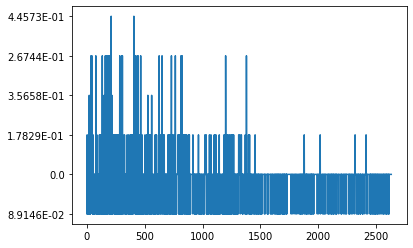

In [23]:
plt.plot(flux)

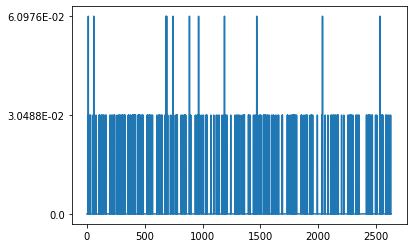

In [37]:
plt.plot(A2E_CR)

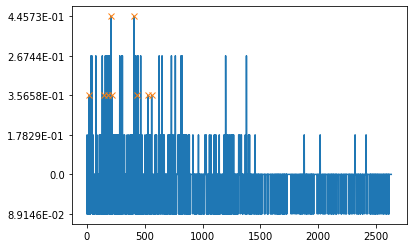

In [96]:
peaks, _ = find_peaks(A1E_flux,prominence=(.3, 1.))
converted = np.array(peaks)
plt.plot(A1E_flux)
plt.plot(peaks, np.take(A1E_flux,peaks), "x")

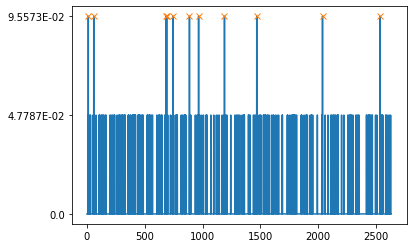

In [101]:
peaks, _ = find_peaks(A2E_flux,prominence=(.05, 1.))
converted = np.array(peaks)
plt.plot(A2E_flux)
plt.plot(peaks, np.take(A2E_flux,peaks), "x")

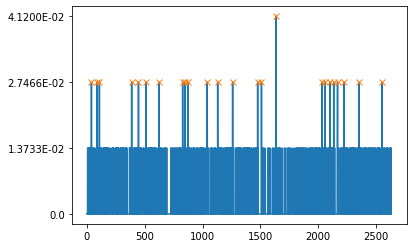

In [106]:
peaks, _ = find_peaks(A3E_flux,prominence=(.02, 1.))
converted = np.array(peaks)
plt.plot(A3E_flux)
plt.plot(peaks, np.take(A3E_flux,peaks), "x")

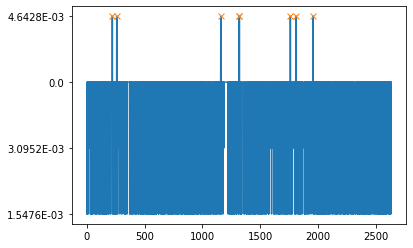

In [111]:
peaks, _ = find_peaks(A4E_flux,prominence=(.004, 1.))
converted = np.array(peaks)
plt.plot(A4E_flux)
plt.plot(peaks, np.take(A4E_flux,peaks), "x")

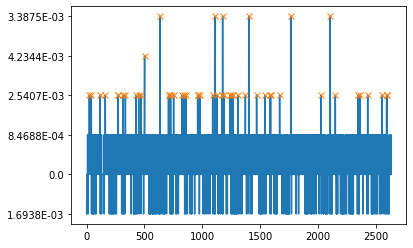

In [113]:
peaks, _ = find_peaks(A5E_flux,prominence=(.002, 1.))
converted = np.array(peaks)
plt.plot(A5E_flux)
plt.plot(peaks, np.take(A5E_flux,peaks), "x")

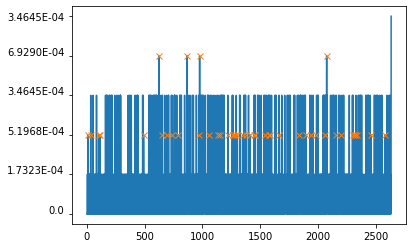

In [119]:
peaks, _ = find_peaks(A6E_flux,prominence=(.0005, 1.))
converted = np.array(peaks)
plt.plot(A6E_flux)
plt.plot(peaks, np.take(A6E_flux,peaks), "x")

In [59]:
peaks, something_else = find_peaks(A6E_flux, distance=150)

In [79]:
print(np.take(A5E_flux,np.take))

TypeError: int() argument must be a string, a bytes-like object or a number, not 'function'

In [120]:
ls

=3.1                        goes-xrs-report_2008.txt
CME deep learning.ipynb     goes-xrs-report_2009.txt
Correlating_metadata.ipynb  goes-xrs-report_2010.txt
Creating_catalog.ipynb      goes-xrs-report_2011.txt
Untitled.ipynb              goes-xrs-report_2012.txt
a.out*                      goes-xrs-report_2013.txt
flares_2004-2016            goes-xrs-report_2014.txt
flares_2010-2016            goes-xrs-report_2015.txt
g15_xrs_1m_testing.csv      goes-xrs-report_2016.txt
goes-xrs-report_2004.txt    testing.c
goes-xrs-report_2005.txt    testing_xray_flux.csv
goes-xrs-report_2006.txt    xray_catalog.py
goes-xrs-report_2007.txt


In [127]:
file = pd.read_csv("g15_xrs_1m_testing.csv",skiprows=167  )

In [135]:
max(file["A_AVG"])

8.5205e-07

In [155]:
av_flux = []
time = []
for i in range(len(file)):
    if((file["A_QUAL_FLAG"]).iloc[i] == 0):
        av_flux.append(file["A_AVG"].iloc[i])
        time.append(file["time_tag"].iloc[i])

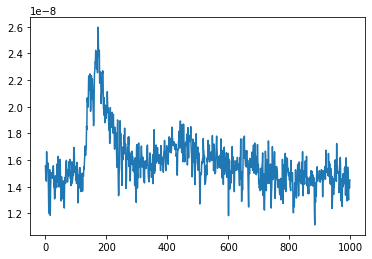

In [144]:
plt.plot(av_flux[9000:10000])

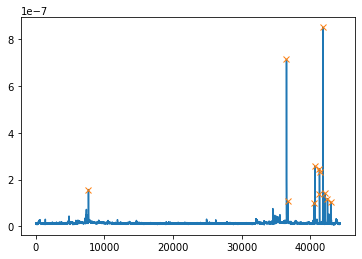

In [153]:
peaks, _ = find_peaks(av_flux,height=.0000001)
converted = np.array(peaks)
plt.plot(av_flux)
plt.plot(peaks, np.take(av_flux,peaks), "x")

In [154]:
file

time_tag  A_QUAL_FLAG  A_NUM_PTS         A_AVG  \
0      2019-01-01 00:00:00.000            0         29  1.217000e-08   
1      2019-01-01 00:01:00.000            0         30  1.189200e-08   
2      2019-01-01 00:02:00.000            0         29  1.232400e-08   
3      2019-01-01 00:03:00.000            0         29  1.209300e-08   
4      2019-01-01 00:04:00.000            0         30  1.129800e-08   
...                        ...          ...        ...           ...   
44635  2019-01-31 23:55:00.000            0         30  1.074100e-08   
44636  2019-01-31 23:56:00.000            0         29  1.213200e-08   
44637  2019-01-31 23:57:00.000            0         29  1.209300e-08   
44638  2019-01-31 23:58:00.000            0         30  1.215200e-08   
44639  2019-01-31 23:59:00.000            0         29  1.259300e-08   

       B_QUAL_FLAG  B_NUM_PTS         B_AVG  
0                0         29  8.881700e-09  
1                0         30  1.076600e-08  
2                0         29  1.349500e-08  
3                0         29  9.967200e-09  
4                0         30  1.207800e-08  
...            ...        ...           ...  
44635            0         30  3.455000e-08  
44636            0         29  3.665200e-08  
44637            0         29  3.855200e-08  
44638            0         30  3.970900e-08  
44639            0         29  3.149600e-08  

[44640 rows x 7 columns]

In [162]:
x_class = pd.read_csv("g15_xrs_1m_Xherecsv.csv",skiprows=166  )

In [166]:
av_flux_513 = []
time_513 = []
for i in range(len(x_class)):
    if((x_class["A_QUAL_FLAG"]).iloc[i] == 0):
        av_flux_513.append(x_class["A_AVG"].iloc[i])
        time_513.append(x_class["time_tag"].iloc[i])

In [163]:
print(x_class)

                      time_tag  A_QUAL_FLAG  A_NUM_PTS         A_AVG  \
0      2013-05-01 00:00:00.000            0         29  4.215300e-09   
1      2013-05-01 00:01:00.000            0         29  3.562000e-09   
2      2013-05-01 00:02:00.000            0         29  5.406600e-09   
3      2013-05-01 00:03:00.000            0         30  5.205500e-09   
4      2013-05-01 00:04:00.000            0         29  2.849500e-09   
...                        ...          ...        ...           ...   
44635  2013-05-31 23:55:00.000            0         30  1.000000e-09   
44636  2013-05-31 23:56:00.000            0         29  1.000000e-09   
44637  2013-05-31 23:57:00.000            0         29  1.000000e-09   
44638  2013-05-31 23:58:00.000            0         30  1.000000e-09   
44639  2013-05-31 23:59:00.000            0         29  1.000000e-09   

       B_QUAL_FLAG  B_NUM_PTS         B_AVG  
0                0         29  9.293700e-07  
1                0         29  9.118200e-07

648


/Users/Alexander_2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


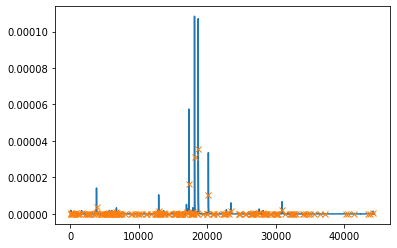

In [327]:
ax = plt.figure()
peaks, _ = find_peaks(av_flux_513,height=.00000004)
converted = np.array(peaks)
print(len(peaks))
plt.plot(av_flux_513)
#chosen = np.take(av_flux_513[0:1000],flare_index)
plt.plot(flare_index, np.take(av_flux_513,flare_index), "x")
ax.show()

In [183]:
flares = open("goes-xrs-report_2013.txt")

In [184]:
date = []
max_time = []
class_flare = []
intensity = []
for line in flares.readlines():
    print(line)
    line = line.split()
    if((line[4][0] == 'S') or (line[4][0] == 'N')):
        del line[4]
    date.append('20'+line[0][5:7]+'-'+line[0][7:9]+'-'+line[0][9:11]+' '+line[2][0:2]+':'+line[2][2:4]+':00.000')
    max_time.append(line[3])
    class_flare.append(line[4])
    intensity.append(line[5])

31777130101  0058 0111 0103                                B 78    G15  4.4E-04                               

31777130101  0847 0913 0906 N26E00                         C 12    G15  1.2E-03 11640 130101.3                

31777130101  1426 1456 1438                                B 52    G15  8.5E-04                               

31777130101  1553 1607 1558                                B 62    G15  4.1E-04                               

31777130101  2252 2301 2258                                B 47    G15  2.5E-04                               

31777130102  0921 0934 0925                                B 56    G15  3.4E-04                               

31777130102  2108 2111 2109                                B 42    G15  9.2E-05                               

31777130103  0408 0429 0415                                B 57    G15  6.0E-04                               

31777130103  1916 1938 1927                                B 79    G15  8.7E-04                         

In [187]:
x_time = []
m_time = []
c_time = []
for index,flare in enumerate(class_flare):
    if(flare == 'X'):
        x_time.append(date[index])
    if(flare=="M"):
        m_time.append(date[index])
    if(flare=="C"):
        c_time.append(date[index])

In [177]:
time_513

['2013-05-01 00:00:00.000',
 '2013-05-01 00:01:00.000',
 '2013-05-01 00:02:00.000',
 '2013-05-01 00:03:00.000',
 '2013-05-01 00:04:00.000',
 '2013-05-01 00:05:00.000',
 '2013-05-01 00:06:00.000',
 '2013-05-01 00:07:00.000',
 '2013-05-01 00:08:00.000',
 '2013-05-01 00:09:00.000',
 '2013-05-01 00:10:00.000',
 '2013-05-01 00:11:00.000',
 '2013-05-01 00:12:00.000',
 '2013-05-01 00:13:00.000',
 '2013-05-01 00:14:00.000',
 '2013-05-01 00:15:00.000',
 '2013-05-01 00:16:00.000',
 '2013-05-01 00:17:00.000',
 '2013-05-01 00:18:00.000',
 '2013-05-01 00:19:00.000',
 '2013-05-01 00:20:00.000',
 '2013-05-01 00:21:00.000',
 '2013-05-01 00:22:00.000',
 '2013-05-01 00:23:00.000',
 '2013-05-01 00:24:00.000',
 '2013-05-01 00:25:00.000',
 '2013-05-01 00:26:00.000',
 '2013-05-01 00:27:00.000',
 '2013-05-01 00:28:00.000',
 '2013-05-01 00:29:00.000',
 '2013-05-01 00:30:00.000',
 '2013-05-01 00:31:00.000',
 '2013-05-01 00:32:00.000',
 '2013-05-01 00:33:00.000',
 '2013-05-01 00:34:00.000',
 '2013-05-01 00:35:0

In [192]:
x_time

['2013-05-13 02:32:00.000',
 '2013-05-13 16:16:00.000',
 '2013-05-14 01:20:00.000',
 '2013-05-15 01:58:00.000',
 '2013-10-25 08:09:00.000',
 '2013-10-25 15:12:00.000',
 '2013-10-28 02:12:00.000',
 '2013-10-29 22:01:00.000',
 '2013-11-05 22:15:00.000',
 '2013-11-08 04:29:00.000',
 '2013-11-10 05:18:00.000',
 '2013-11-19 10:34:00.000']

In [305]:
flare_index = []
for time in (x_time):
    for index, noaa in enumerate(time_513):
        if(time == noaa):
            print(index)
            flare_index.append(index)

17318
18142
18686
20164


In [306]:

for time in (m_time):
    for index, noaa in enumerate(time_513):
        if(time == noaa):
            print(index)
            flare_index.append(index)

1663
3817
3836
6733
12914
13630
16989
17098
17895
22800
23476
27600
30943
44188


In [307]:

for time in (c_time):
    for index, noaa in enumerate(time_513):
        if(time == noaa):
            print(index)
            flare_index.append(index)

73
90
120
262
343
376
634
652
787
1197
1071
1133
1434
2324
2376
2584
2659
2730
2815
2865
3515
3682
4053
4420
4576
4675
4699
4977
5021
5219
5321
5397
5625
5649
5709
5862
5976
6063
6177
6194
6231
6299
6490
6618
6632
6641
6675
6859
6916
7042
7112
7164
7206
7228
7587
8006
8878
9048
9496
9887
10005
10391
11047
11126
11746
12430
12506
12640
12683
12737
12818
13013
13032
13100
13161
13442
13728
13891
14214
14467
15072
15135
15296
15375
15449
15489
15862
15919
15937
15951
16011
16056
16089
16110
16115
16234
16280
16367
16691
17212
17595
17657
17690
17743
17806
17946
18076
18460
18497
19350
19947
19984
20834
20859
21024
21407
22232
22446
22606
22656
23200
24593
24688
24786
25462
25672
26317
26361
26514
26546
26664
26721
26852
26895
27083
27290
28109
28147
28227
28406
28455
28590
28699
29151
29327
29737
30011
30040
30147
30174
30305
31271
32040
32233
32382
32431
32601
32616
33005
33914
34154
34450
34641
35012
35588
36403
37116
40253
40589
41471
43507
43686


In [254]:
c_time

['2013-01-01 09:13:00.000',
 '2013-01-03 21:45:00.000',
 '2013-01-04 01:09:00.000',
 '2013-01-04 10:34:00.000',
 '2013-01-04 13:15:00.000',
 '2013-01-04 01:19:00.000',
 '2013-01-05 03:32:00.000',
 '2013-01-05 03:57:00.000',
 '2013-01-05 04:52:00.000',
 '2013-01-05 06:10:00.000',
 '2013-01-05 08:14:00.000',
 '2013-01-05 16:24:00.000',
 '2013-01-05 21:49:00.000',
 '2013-01-06 03:09:00.000',
 '2013-01-06 10:12:00.000',
 '2013-01-06 11:32:00.000',
 '2013-01-06 13:01:00.000',
 '2013-01-06 17:12:00.000',
 '2013-01-07 01:10:00.000',
 '2013-01-07 04:03:00.000',
 '2013-01-07 06:46:00.000',
 '2013-01-07 07:51:00.000',
 '2013-01-07 08:57:00.000',
 '2013-01-07 10:00:00.000',
 '2013-01-07 18:24:00.000',
 '2013-01-07 00:04:00.000',
 '2013-01-08 01:24:00.000',
 '2013-01-08 03:07:00.000',
 '2013-01-08 05:01:00.000',
 '2013-01-08 05:48:00.000',
 '2013-01-08 07:26:00.000',
 '2013-01-08 14:04:00.000',
 '2013-01-08 14:29:00.000',
 '2013-01-08 16:07:00.000',
 '2013-01-08 19:19:00.000',
 '2013-01-09 04:01:0

In [257]:
time_513

['2013-05-01 00:00:00.000',
 '2013-05-01 00:01:00.000',
 '2013-05-01 00:02:00.000',
 '2013-05-01 00:03:00.000',
 '2013-05-01 00:04:00.000',
 '2013-05-01 00:05:00.000',
 '2013-05-01 00:06:00.000',
 '2013-05-01 00:07:00.000',
 '2013-05-01 00:08:00.000',
 '2013-05-01 00:09:00.000',
 '2013-05-01 00:10:00.000',
 '2013-05-01 00:11:00.000',
 '2013-05-01 00:12:00.000',
 '2013-05-01 00:13:00.000',
 '2013-05-01 00:14:00.000',
 '2013-05-01 00:15:00.000',
 '2013-05-01 00:16:00.000',
 '2013-05-01 00:17:00.000',
 '2013-05-01 00:18:00.000',
 '2013-05-01 00:19:00.000',
 '2013-05-01 00:20:00.000',
 '2013-05-01 00:21:00.000',
 '2013-05-01 00:22:00.000',
 '2013-05-01 00:23:00.000',
 '2013-05-01 00:24:00.000',
 '2013-05-01 00:25:00.000',
 '2013-05-01 00:26:00.000',
 '2013-05-01 00:27:00.000',
 '2013-05-01 00:28:00.000',
 '2013-05-01 00:29:00.000',
 '2013-05-01 00:30:00.000',
 '2013-05-01 00:31:00.000',
 '2013-05-01 00:32:00.000',
 '2013-05-01 00:33:00.000',
 '2013-05-01 00:34:00.000',
 '2013-05-01 00:35:0

In [279]:
len(peaks)

648

<_io.TextIOWrapper name='goes-xrs-report_2013.txt' mode='r' encoding='UTF-8'>

These are the times of the peaks found from the xrs-a data in may of 2013

In [272]:
new_peak_times_may = np.take(time_513,peaks)

Now I need to see how closely these correlate to the tiems from the catalog

In [282]:
noaa_peaks_may = []
for index,time in enumerate(date):
    if(time >  '2013-05-01 00:00:00.000') & (time <  '2013-06-01 00:00:00.000'):
        if(class_flare[index] != 'B'):
            noaa_peaks_may.append(time)

In [283]:
len(noaa_peaks_may)

191

this will see what the required range is to find a peak

In [291]:
distance = []
for peak in noaa_peaks_may:
    peak_time = Time(peak,'iso')
    dist = 10
    for my_time in new_peak_times_may:
        my_peak = Time(my_time,'iso')
        dist = min(dist,np.abs(my_peak -peak_time))
    print(dist)

0.00694444444444442
0.00347222222222221
0.004166666666666652
0.004861111111111094
0.0
0.001388888888888884
0.002777777777777768
0.004861111111111094
0.00347222222222221
0.04236111111111118
0.006944444444444531
0.004166666666666652
0.004166666666666763
0.03541666666666665
0.007638888888888862
0.00347222222222221
0.039583333333333304
0.002777777777777768
0.005555555555555536
0.004166666666666652
0.00347222222222221
0.00347222222222221
0.008333333333333304
0.00347222222222221
0.006249999999999978
0.006944444444444531
0.005555555555555536
0.005555555555555536
0.002777777777777768
0.004861111111111094
0.00347222222222221
0.004166666666666652
0.002083333333333326
0.004166666666666652
0.004166666666666763
0.004166666666666652
0.001388888888888884
0.004166666666666652
0.00347222222222221
0.011805555555555625
0.005555555555555536
0.002777777777777768
0.004166666666666652
0.00347222222222221
0.002083333333333326
0.002083333333333326
0.002777777777777879
0.002083333333333326
0.00347222222222221
0

In [308]:
flare_index

[17318,
 18142,
 18686,
 20164,
 1663,
 3817,
 3836,
 6733,
 12914,
 13630,
 16989,
 17098,
 17895,
 22800,
 23476,
 27600,
 30943,
 44188,
 73,
 90,
 120,
 262,
 343,
 376,
 634,
 652,
 787,
 1197,
 1071,
 1133,
 1434,
 2324,
 2376,
 2584,
 2659,
 2730,
 2815,
 2865,
 3515,
 3682,
 4053,
 4420,
 4576,
 4675,
 4699,
 4977,
 5021,
 5219,
 5321,
 5397,
 5625,
 5649,
 5709,
 5862,
 5976,
 6063,
 6177,
 6194,
 6231,
 6299,
 6490,
 6618,
 6632,
 6641,
 6675,
 6859,
 6916,
 7042,
 7112,
 7164,
 7206,
 7228,
 7587,
 8006,
 8878,
 9048,
 9496,
 9887,
 10005,
 10391,
 11047,
 11126,
 11746,
 12430,
 12506,
 12640,
 12683,
 12737,
 12818,
 13013,
 13032,
 13100,
 13161,
 13442,
 13728,
 13891,
 14214,
 14467,
 15072,
 15135,
 15296,
 15375,
 15449,
 15489,
 15862,
 15919,
 15937,
 15951,
 16011,
 16056,
 16089,
 16110,
 16115,
 16234,
 16280,
 16367,
 16691,
 17212,
 17595,
 17657,
 17690,
 17743,
 17806,
 17946,
 18076,
 18460,
 18497,
 19350,
 19947,
 19984,
 20834,
 20859,
 21024,
 21407,
 22

In [311]:
chosen

array([1.6656e-05, 3.1288e-05, 3.5754e-05, 1.0589e-05, 3.1865e-07,
       3.6007e-07, 3.9412e-06, 8.0022e-07, 1.5210e-06, 3.2465e-07,
       8.9363e-07, 4.5361e-07, 9.0078e-07, 3.0908e-07, 1.7400e-06,
       6.2270e-07, 2.2467e-06, 3.4055e-07, 1.9173e-08, 4.9813e-07,
       1.3084e-07, 6.1151e-08, 4.5950e-08, 2.1309e-07, 1.3131e-08,
       3.6150e-08, 2.4628e-07, 9.5186e-09, 2.3584e-08, 2.4671e-08,
       7.5971e-09, 1.8550e-08, 1.3900e-08, 6.3397e-08, 3.6535e-08,
       2.6504e-08, 2.1960e-08, 2.9502e-08, 2.2124e-08, 4.0416e-08,
       1.6782e-08, 4.6296e-08, 3.4367e-08, 1.0787e-08, 1.1213e-07,
       1.6839e-07, 2.0087e-08, 2.9425e-08, 2.8541e-08, 6.1449e-08,
       1.5941e-08, 3.2435e-08, 5.1637e-07, 9.3648e-09, 3.2324e-08,
       4.4297e-07, 1.9626e-08, 1.5793e-08, 4.7109e-08, 4.0014e-08,
       2.8015e-08, 2.8795e-08, 9.4882e-08, 1.3076e-07, 6.8916e-08,
       4.0892e-07, 1.1286e-08, 2.6789e-08, 8.3726e-08, 1.9211e-08,
       1.2055e-08, 7.4888e-08, 2.2277e-08, 8.4425e-09, 1.5091e

In [319]:
flare_index

[73,
 90,
 120,
 262,
 343,
 376,
 634,
 652,
 787,
 1071,
 1133,
 1197,
 1434,
 1663,
 2324,
 2376,
 2584,
 2659,
 2730,
 2815,
 2865,
 3515,
 3682,
 3817,
 3836,
 4053,
 4420,
 4576,
 4675,
 4699,
 4977,
 5021,
 5219,
 5321,
 5397,
 5625,
 5649,
 5709,
 5862,
 5976,
 6063,
 6177,
 6194,
 6231,
 6299,
 6490,
 6618,
 6632,
 6641,
 6675,
 6733,
 6859,
 6916,
 7042,
 7112,
 7164,
 7206,
 7228,
 7587,
 8006,
 8878,
 9048,
 9496,
 9887,
 10005,
 10391,
 11047,
 11126,
 11746,
 12430,
 12506,
 12640,
 12683,
 12737,
 12818,
 12914,
 13013,
 13032,
 13100,
 13161,
 13442,
 13630,
 13728,
 13891,
 14214,
 14467,
 15072,
 15135,
 15296,
 15375,
 15449,
 15489,
 15862,
 15919,
 15937,
 15951,
 16011,
 16056,
 16089,
 16110,
 16115,
 16234,
 16280,
 16367,
 16691,
 16989,
 17098,
 17212,
 17318,
 17595,
 17657,
 17690,
 17743,
 17806,
 17895,
 17946,
 18076,
 18142,
 18460,
 18497,
 18686,
 19350,
 19947,
 19984,
 20164,
 20834,
 20859,
 21024,
 21407,
 22232,
 22446,
 22606,
 22656,
 22800,
 23